In [8]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
# import pyspark
# from pyspark.sql import SparkSession

#### pyspark

In [2]:
import findspark
findspark.init()
findspark.find()

'c:\\ProgramData\\Miniconda3\\lib\\site-packages\\pyspark'

In [3]:
spark = SparkSession.builder.appName(
    'Read CSV File into DataFrame').getOrCreate()

In [4]:
base_dir=os.getcwd()
dataset_dir=os.path.join(base_dir,'kaggle_dataset/')
files=os.listdir(dataset_dir)

In [5]:
subjects_id = [ int(i[0:i.find('.')]) for i in files[0:37] ]

In [6]:
with open(os.path.join(dataset_dir, 'columnLabels.csv')) as f:
    column_labels=list(csv.reader(f, delimiter=","))
    column_labels=column_labels[0]

In [8]:
# subject_eeg_df = spark.read.csv(os.path.join(dataset_dir,files[0]+"/",files[0]), sep=',',
#                          inferSchema=False, header=False).toDF(*column_labels)
subject_eeg_df = pd.read_csv(os.path.join(dataset_dir,files[0]+"/",files[0]),delimiter=',',
    header=0,
    names=column_labels
)
for i in range(1,37):
    # subject_eeg_df = subject_eeg_df.union(
    #     spark.read.csv(os.path.join(dataset_dir,files[i]+"/",files[i]),sep=',', 
    #     inferSchema=False,
    #     header=False
    #     ).toDF(*column_labels))
    subject_eeg_df = pd.concat([
        pd.read_csv(
            os.path.join(dataset_dir,files[i]+"/",files[i]),
            delimiter=',',
            header=0,
            names=column_labels
        ),
        subject_eeg_df
    ]
    )

MemoryError: Unable to allocate 9.81 GiB for an array with shape (74, 17796076) and data type float64

In [8]:
unwanted_electrodes = column_labels[-6 : -2]
subject_eeg_df = subject_eeg_df.drop(*unwanted_electrodes)

In [9]:
class Trials:
    def __init__(self):
        self.conditions=list()
class subjectData:
    def __init__(self):
        self.trials=list()

In [ ]:
subjects_data_info=list()
for subject_id in subjects_id:
    subjects_data_info.append(
        list(subject_eeg_df.where('subject=='+str(subject_id)).select('trial').distinct().toPandas())
        )

In [11]:
x=subject_eeg_df.where('subject==1').select('trial').distinct().toPandas()

In [15]:
list(x['trial'])

['22.0000',
 '31.0000',
 '79.0000',
 '90.0000',
 '94.0000',
 '61.0000',
 '36.0000',
 '75.0000',
 '71.0000',
 '41.0000',
 '6.0000',
 '38.0000',
 '78.0000',
 '50.0000',
 '32.0000',
 '5.0000',
 '54.0000',
 '57.0000',
 '95.0000',
 '98.0000',
 '72.0000',
 '14.0000',
 '4.0000',
 '58.0000',
 '17.0000',
 '77.0000',
 '23.0000',
 '65.0000',
 '66.0000',
 '11.0000',
 '20.0000',
 '63.0000',
 '67.0000',
 '62.0000',
 '68.0000',
 '52.0000',
 '70.0000',
 '24.0000',
 '80.0000',
 '48.0000',
 '26.0000',
 '69.0000',
 '21.0000',
 '86.0000',
 '55.0000',
 '46.0000',
 '9.0000',
 '29.0000',
 '28.0000',
 '99.0000',
 '1.0000',
 '84.0000',
 '97.0000',
 '88.0000',
 '34.0000',
 '83.0000',
 '35.0000',
 '40.0000',
 '45.0000',
 '93.0000',
 '7.0000',
 '100.0000',
 '92.0000',
 '51.0000',
 '27.0000',
 '60.0000',
 '56.0000',
 '33.0000',
 '37.0000',
 '74.0000',
 '25.0000',
 '13.0000',
 '16.0000',
 '82.0000',
 '15.0000',
 '12.0000',
 '3.0000',
 '89.0000',
 '19.0000',
 '49.0000',
 '73.0000',
 '91.0000',
 '87.0000',
 '43.0000'

#### ctft plot

In [2]:
ctft = pd.read_csv('ctft.csv')

In [3]:
ctft

,Ch0,Ch1,Ch2,Ch3,Ch4,Ch5,Ch6,Ch7,Ch8,Ch9,...,Ch143,Ch144,Ch145,Ch146,Ch147,Ch148,Ch149,Ch150,Ch151,timestamp
0,-0.389438,-0.261529,-0.457853,3.203222,4.796581,3.809868,4.631791,6.400519,7.921038,9.949849,...,-4.387168,-6.130902,-6.095934,-5.190980,-4.786661,-5.965759,-7.349496,-8.772745,-9.780253,20216.165094
1,-1.288385,0.916838,3.747461,6.160938,4.063136,3.548452,5.230470,6.926514,7.921758,9.946092,...,-9.999124,-10.357917,-9.443609,-8.353341,-7.999258,-9.320842,-10.920007,-12.306792,-12.077796,20216.169094
2,-0.239677,-0.338853,1.504820,0.475222,-0.997874,1.242389,3.907473,5.143972,6.150117,8.155873,...,-13.894005,-12.914820,-11.130061,-9.710502,-11.079859,-11.955049,-13.854319,-14.351363,-14.505686,20216.173094
3,0.977292,-0.040972,-3.654055,-6.782312,-4.644615,-0.956128,1.352336,1.612141,2.981566,4.765753,...,-14.561263,-12.337797,-10.773293,-10.671020,-11.899400,-13.616913,-15.065828,-15.926896,-14.870305,20216.177094
4,0.904067,-0.420023,-2.866502,-4.829818,-2.779629,-1.586592,-1.737686,-2.397893,-0.872292,0.440140,...,-12.268547,-9.975006,-8.607034,-10.050524,-11.813690,-14.143067,-15.343117,-15.105222,-14.269546,20216.181094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3001,-0.562369,0.510035,-0.022131,3.112400,9.826537,11.609536,5.662350,-4.031319,-11.723851,-16.784082,...,-5.746750,-6.172097,-4.335415,-0.416000,3.890543,7.293150,8.692052,8.299586,7.000270,20248.539153
3002,-0.591448,0.358263,1.648835,9.711114,8.220549,5.586692,0.331409,-8.277177,-16.974197,-22.291254,...,0.963001,0.213334,0.153149,2.815452,6.681824,10.301447,11.858162,12.510136,12.180417,20248.543153
3003,0.149266,-2.125149,4.205408,3.739016,-2.245765,-5.921091,-7.762035,-11.498795,-17.532073,-23.209567,...,7.370370,6.429302,5.158852,6.593479,9.267111,12.637290,15.002839,16.501830,16.601795,20248.547153
3004,0.590338,4.346148,-0.959283,-9.088403,-12.312900,-13.987199,-12.250786,-11.732704,-14.218924,-19.263499,...,12.625201,11.134967,9.645306,9.801231,11.294114,14.108891,17.829633,19.170754,19.575336,20248.551153


Text(249.0, 0.5, 'channel/frequency')

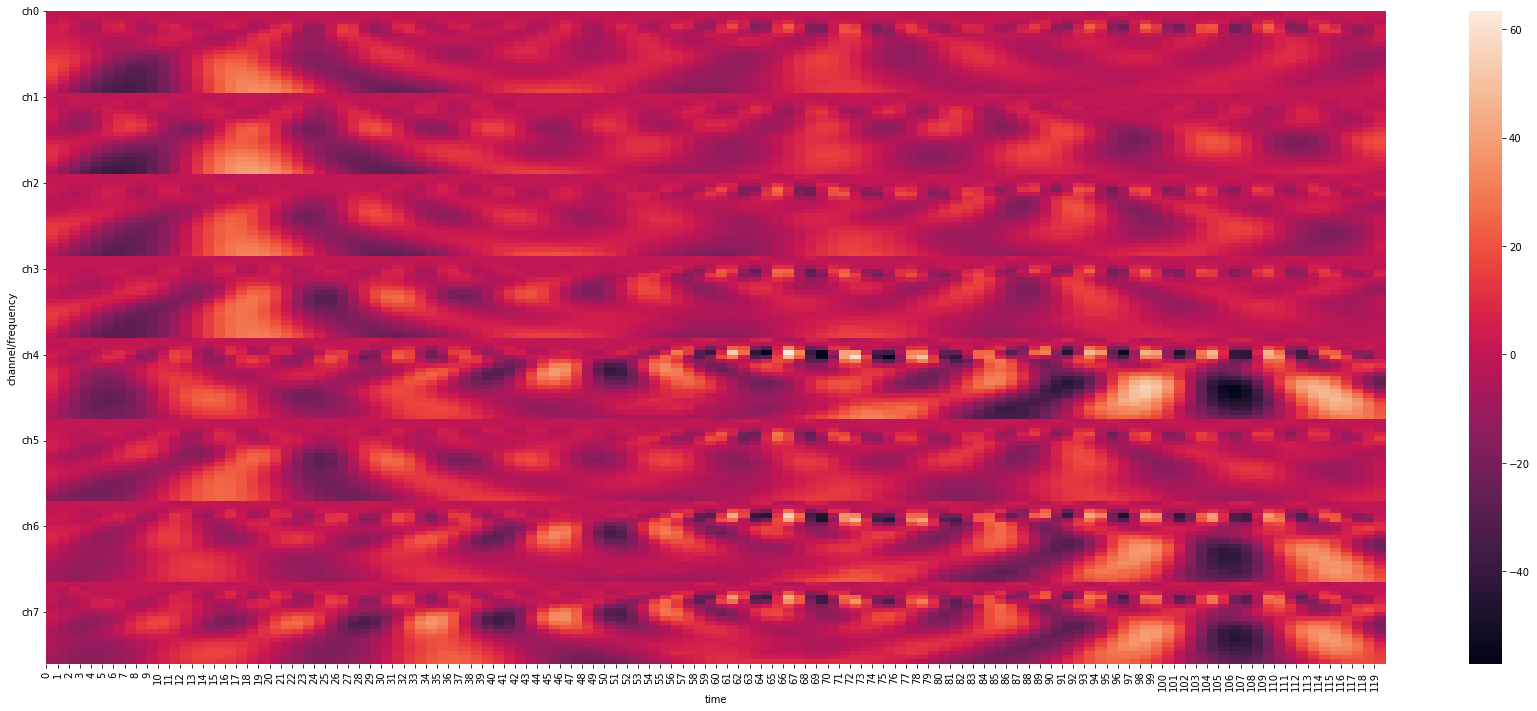

In [24]:
plt.figure(figsize=(30,12))
sns.heatmap(ctft.iloc[0:120,0:152].T)
plt.xticks([i for i in range(0,120)], [i for i in range(0,120)])
plt.yticks([0,20,40,60,80,100,120,140],['ch0','ch1','ch2','ch3','ch4','ch5','ch6','ch7',])
plt.xlabel('time')
plt.ylabel('channel/frequency')